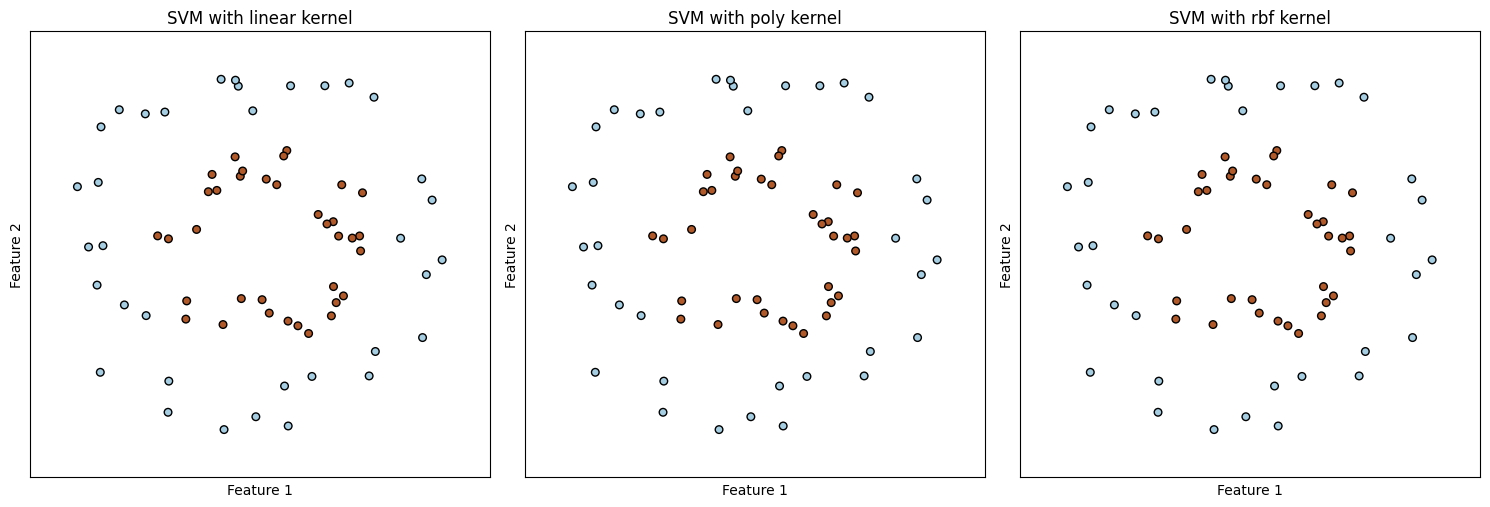

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
X, y = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define kernels
kernels = ['linear', 'poly', 'rbf']
C = 1.0  # Regularization parameter

# Plot decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, kernel in zip(axes, kernels):
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train, y_train)
    ax.set_title(f'SVM with {kernel} kernel')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30, edgecolors='k')
    ax.set_xlim(X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5)
    ax.set_ylim(X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_aspect('equal')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred = model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.97
Precision: 1.00
Recall: 0.93
F1 Score: 0.97
